<a href="https://colab.research.google.com/github/Andre119160103/Tugas-2_119160103_Andre-Markus-Fernando/blob/main/Tugas_12_Terbaru.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2059]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

Neural Network

In [2060]:
#record data from i:look_back+i
def convert2matrix(data_arr, look_back):
    X, Y =[], []
    for i in range(len(data_arr)-look_back):
        d = look_back + i 
        X.append(data_arr[i:d])
        Y.append(data_arr[d])

    X = np.array(X)
    Y = np.array(Y)

    return X, Y

Text(0, 0.5, 'Gelombang')

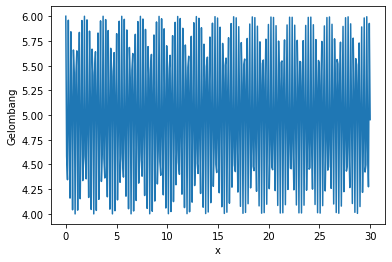

In [2061]:
x_wave = np.linspace(0,30, 30*12)
K0 = 5
K1 = 23.93
sin_wave = K0 + np.cos(K1*x_wave)

plt.plot(x_wave, sin_wave)
plt.xlabel('x')
plt.ylabel('Gelombang')

In [2062]:
len(sin_wave)

360

Text(0, 0.5, 'Harga')

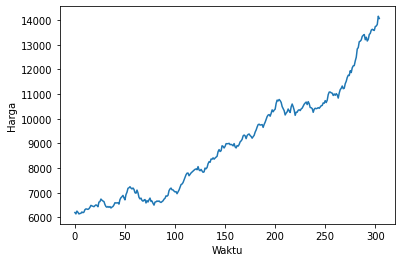

In [2063]:
np.random.seed(4014 + 2022)
S = [6200] 
for time in range(1, 305):
    val = S[time -1]*np.exp(10**(-5)*((241 - 0.5*8.69) + 932*np.random.normal(0,1)) )
    S.append(val)

random_model = np.array(S)
plt.plot(random_model)
plt.xlabel('Waktu')
plt.ylabel('Harga')

Model Neural Network

Text(0, 0.5, 'y')

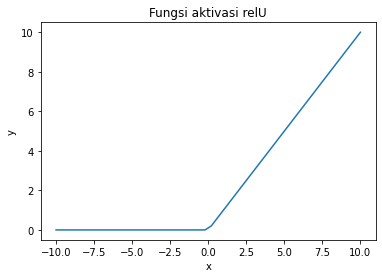

In [2064]:
x = np.linspace(-10,10)
y = np.maximum(x,0)

plt.title("Fungsi aktivasi relU")
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("y")

In [2065]:
#Fungsi untuk membangun model berdasarkan dimensi input: look_back
def model_dnn(look_back):
    model=tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(units=32, input_dim=look_back, activation='relu')) #hidden layer 1
    model.add(tf.keras.layers.Dense(8, activation='sigmoid')) #hidden layer 2
    model.add(tf.keras.layers.Dense(1))
    model.compile(loss='mean_squared_error',  optimizer='adam', metrics = ['mse', 'mae'])
    return model

In [2066]:
#Fungsi untuk menyajikan loss
def model_loss(history):
    plt.figure(figsize=(8,4))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    #plt.legend(loc='upper right')
    plt.show();

Model DNN Bagi Data Gelombang

In [2067]:
sin_wave.shape

(360,)

In [2068]:
from sklearn.preprocessing import MinMaxScaler
#Karena dimensi datanya (360,0), maka perlu pengaturan dimensi dengan reshape
wave = np.reshape(sin_wave, (-1, 1)) 
wave.shape

(360, 1)

In [2069]:
#lakukan penskalaan data
scaler = MinMaxScaler(feature_range=(0, 1))
waveScaled = scaler.fit_transform(wave)

In [2070]:
#buat dataset baru berukuran (n-look_back) x look_back
look_back = 4
XwaveScaled, YwaveScaled = convert2matrix(waveScaled, look_back)

In [2071]:
from sklearn.model_selection import train_test_split
XwaveScaled_train, XwaveScaled_test, YwaveScaled_train, YwaveScaled_test = train_test_split(XwaveScaled, YwaveScaled,test_size=0.2, shuffle=False )

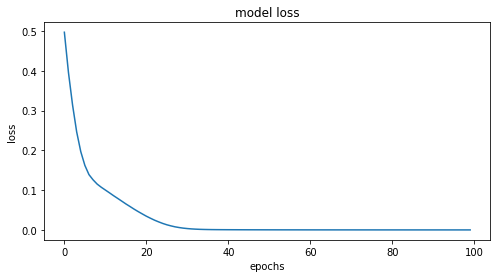

In [2072]:
tf.random.set_seed(4013)
modelWave = model_dnn(look_back)
historyWave = modelWave.fit(XwaveScaled_train,YwaveScaled_train, epochs=100, verbose = 0) #Perhatikana bahwa RMSE disini adalah untuk data yang telah dilakukan penskalaan
model_loss(historyWave)

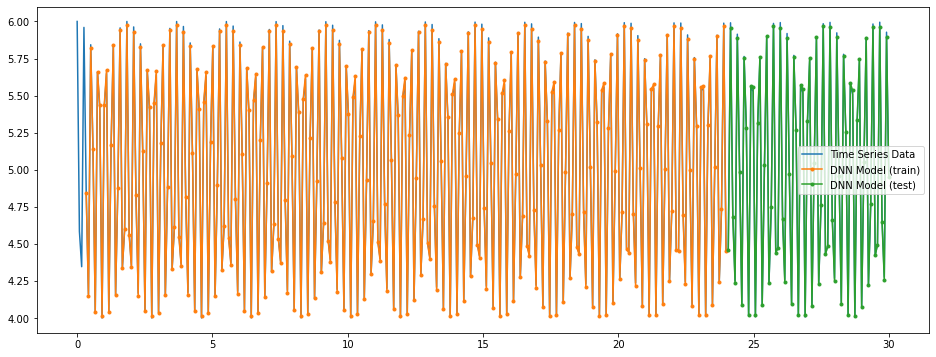

In [2073]:
plt.figure(figsize=(16,6))
YmodelWaveDNN_train = modelWave.predict(XwaveScaled_train)
YmodelWaveDNN_test = modelWave.predict(XwaveScaled_test)
#kembalikan skala
resultWaveDNN_train = scaler.inverse_transform(YmodelWaveDNN_train)
resultWaveDNN_test = scaler.inverse_transform(YmodelWaveDNN_test)

plt.plot(x_wave, sin_wave, label = 'Time Series Data')
plt.plot(x_wave[look_back:look_back+len(resultWaveDNN_train)], resultWaveDNN_train, '.-', label ='DNN Model (train)')
plt.plot(x_wave[look_back+len(resultWaveDNN_train)::], resultWaveDNN_test, '.-', label='DNN Model (test)')
plt.legend()

(24.06685236768802, 30.0, 3.9, 6.1)

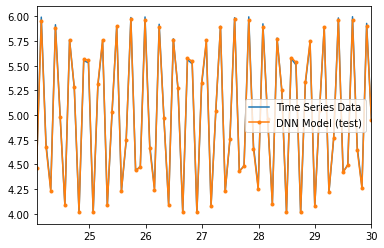

In [2074]:
#test data
plt.plot(x_wave, sin_wave, label = 'Time Series Data')
plt.plot(x_wave[look_back+len(resultWaveDNN_train)::], resultWaveDNN_test, '.-', label='DNN Model (test)')
plt.legend()
plt.axis([x_wave[look_back+len(resultWaveDNN_train)], x_wave[-1], 3.9, 6.1])

In [2075]:
RMSE_WAVE_DNN_TRAIN = np.mean((resultWaveDNN_train - sin_wave[look_back:look_back+len(resultWaveDNN_train)])**2)
RMSE_WAVE_DNN_TRAIN

0.9956356346854921

In [2076]:
RMSE_WAVE_DNN_TEST = np.mean((resultWaveDNN_test - sin_wave[look_back+len(resultWaveDNN_train)])**2)
RMSE_WAVE_DNN_TEST

0.7790554

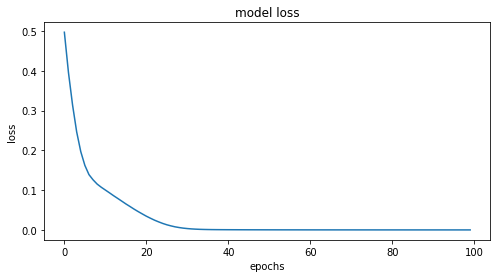

In [2077]:
model_loss(historyWave)

Model DNN bagi Data Brownian Motion (Data Acak)

In [2078]:
from sklearn.preprocessing import MinMaxScaler
#pengaturan dimensi dengan reshape
random_model = np.reshape(random_model, (-1, 1)) 
#lakukan penskalaan data
scaler3 = MinMaxScaler(feature_range=(0, 1))
randomScaled = scaler3.fit_transform(random_model)

#buat dataset baru berukuran (n-look_back) x look_back
look_back3 = 4
XrandomScaled, YrandomScaled = convert2matrix(randomScaled, look_back3)

In [2079]:
from sklearn.model_selection import train_test_split
XrandomScaled_train, XrandomScaled_test, YrandomScaled_train, YrandomScaled_test = train_test_split(XrandomScaled, YrandomScaled,test_size=0.2, shuffle=False )

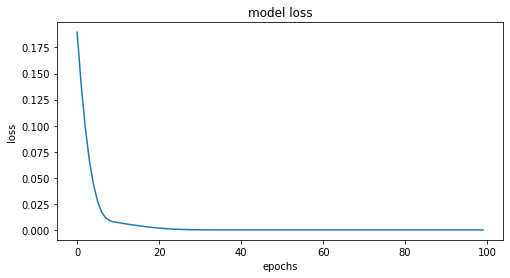

In [2080]:
tf.random.set_seed(4013)
modelRandom = model_dnn(look_back3)
historyRandom = modelRandom.fit(XrandomScaled_train, YrandomScaled_train, epochs=100, verbose=0)
model_loss(historyRandom)

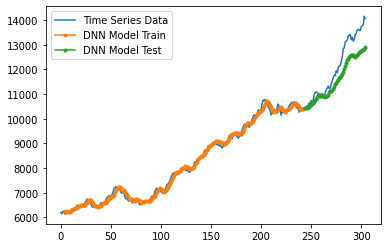

In [2081]:
YmodelRandomDNN_train = modelRandom.predict(XrandomScaled_train)
YmodelRandomDNN_test = modelRandom.predict(XrandomScaled_test)
#kembalikan skala
resultRandomDNN_train = scaler3.inverse_transform(YmodelRandomDNN_train)
resultRandomDNN_test = scaler3.inverse_transform(YmodelRandomDNN_test)
plt.plot(np.arange(len(random_model)), random_model, label ='Time Series Data')
plt.plot(np.arange(look_back3,look_back3+len(resultRandomDNN_train)), resultRandomDNN_train, '.-', Label ='DNN Model Train')
plt.plot(np.arange(look_back3+len(resultRandomDNN_train), len(random_model)), resultRandomDNN_test, '.-', Label = 'DNN Model Test')
plt.legend()

In [2082]:
RMSE_RANDOM_DNN_TRAIN = np.mean((resultRandomDNN_train - sin_wave[look_back:look_back+len(resultRandomDNN_train)])**2)
RMSE_RANDOM_DNN_TRAIN

69770463.3471699

Text(0.5, 1.0, 'Hasil Prediksi pada data Train')

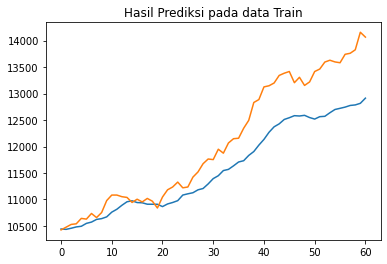

In [2083]:
plt.plot(resultRandomDNN_test)
plt.plot(random_model[look_back3+len(resultRandomDNN_train)::])
plt.title("Hasil Prediksi pada data Train")

In [2084]:
RMSE_RANDOM_DNN_TEST = np.mean((resultRandomDNN_test - sin_wave[look_back:look_back+len(resultRandomDNN_train)])**2)
RMSE_RANDOM_DNN_TEST

134566520.66073796

Recurrent Neural Network

In [2085]:
def model_rnn(look_back):
    model=tf.keras.Sequential()
    model.add(tf.keras.layers.SimpleRNN(units=32, input_dim=look_back, activation="relu")) #HL1
    model.add(tf.keras.layers.Dense(8, activation='sigmoid')) #HL2
    model.add(tf.keras.layers.Dense(1)) #O
    model.compile(loss='mean_squared_error',  optimizer='adam',metrics = ['mse', 'mae'])
    return model

Model RNN bagi Data Gelombang

In [2086]:
look_back = 4 #create window size as look_back=30
sin_wave = np.reshape(sin_wave, (-1, 1)) 
scaler4 = MinMaxScaler(feature_range=(0, 1))
waveScaled = scaler4.fit_transform(sin_wave)

XRNN, YRNN =convert2matrix(waveScaled,look_back)

# reshape input to be [samples, window size, features]
XRNN = np.reshape(XRNN, (XRNN.shape[0], 1, XRNN.shape[1]))

In [2087]:
from sklearn.model_selection import train_test_split
XRNN_train, XRNN_test, YRNN_train, YRNN_test = train_test_split(XRNN, YRNN, test_size=0.2, shuffle=False)

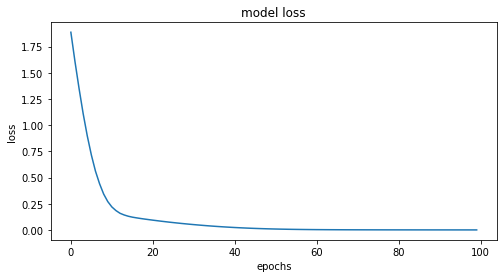

In [2088]:
tf.random.set_seed(4013)
modelWaveRNN = model_rnn(look_back)
history = modelWaveRNN.fit(XRNN_train, YRNN_train, epochs=100, verbose=0)
model_loss(history)

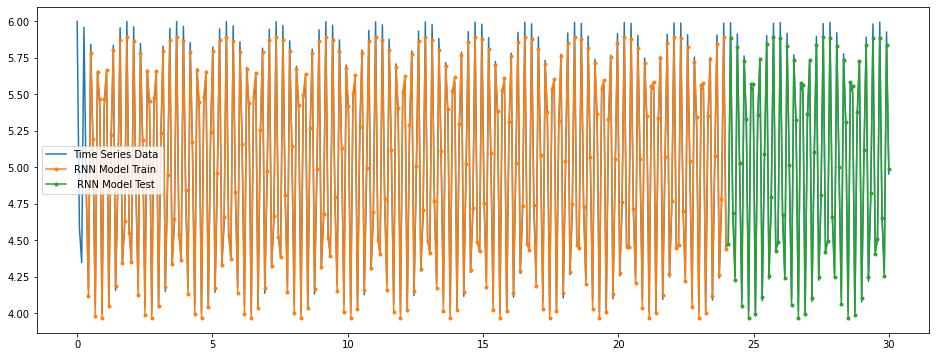

In [2089]:
plt.figure(figsize=(16,6))
YmodelWaveRNN_train = modelWaveRNN.predict(XRNN_train)
YmodelWaveRNN_test = modelWaveRNN.predict(XRNN_test)

#kembalikan skala
resultWaveRNN_train = scaler4.inverse_transform(YmodelWaveRNN_train)
resultWaveRNN_test = scaler4.inverse_transform(YmodelWaveRNN_test)
plt.plot(x_wave,sin_wave, label = 'Time Series Data')
plt.plot(x_wave[look_back:look_back+len(resultWaveRNN_train)], resultWaveRNN_train, '.-' , label = 'RNN Model Train')
plt.plot(x_wave[look_back+len(resultWaveRNN_train)::], resultWaveRNN_test, '.-', label =' RNN Model Test')
plt.legend()

(24.06685236768802, 30.0, 3.9, 6.1)

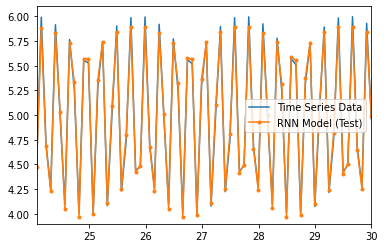

In [2090]:
#test data
plt.plot(x_wave, sin_wave, label = 'Time Series Data')
plt.plot(x_wave[look_back+len(resultWaveRNN_train)::], resultWaveRNN_test, '.-', label='RNN Model (Test)')
plt.legend()
plt.axis([x_wave[look_back+len(resultWaveRNN_train)],x_wave[-1], 3.9, 6.1])

In [2091]:
RMSE_WAVE_RNN_TRAIN = np.mean((resultWaveRNN_train - sin_wave[look_back:look_back+len(resultWaveRNN_train)])**2)
RMSE_WAVE_RNN_TRAIN

0.002750653729264001

In [2092]:
RMSE_WAVE_RNN_TEST = np.mean((resultWaveRNN_test - sin_wave[look_back+len(resultWaveRNN_train)::])**2)
RMSE_WAVE_RNN_TEST

0.0028424017523910254

Model RNN bagi Data Acak

In [2093]:
from sklearn.preprocessing import MinMaxScaler
#pengaturan dimensi dengan reshape
random_model = np.reshape(random_model, (-1, 1)) 
#lakukan penskalaan data
scaler3 = MinMaxScaler(feature_range=(0, 1))
randomScaled = scaler3.fit_transform(random_model)

#buat dataset baru berukuran (n-look_back) x look_back
look_back3 = 4
XrandomScaled, YrandomScaled = convert2matrix(randomScaled, look_back3)
XrandomScaled = np.reshape(XrandomScaled, (XrandomScaled.shape[0], 1, XrandomScaled.shape[1]))

In [2094]:
from sklearn.model_selection import train_test_split
XrandomScaled_train, XrandomScaled_test, YrandomScaled_train, YrandomScaled_test = train_test_split(XrandomScaled, YrandomScaled, test_size=0.2, shuffle=False)

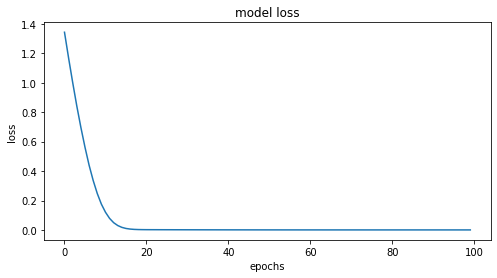

In [2095]:
tf.random.set_seed(4013)
modelRandomRNN = model_rnn(look_back3)
historyRandomRNN = modelRandomRNN.fit(XrandomScaled_train, YrandomScaled_train, epochs=100, verbose=0)
model_loss(historyRandomRNN)

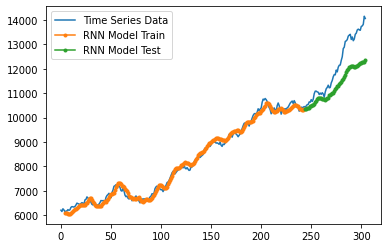

In [2096]:
YmodelRandomRNN_train = modelRandomRNN.predict(XrandomScaled_train)
YmodelRandomRNN_test = modelRandomRNN.predict(XrandomScaled_test)
#kembalikan skala
resultRandomRNN_train = scaler3.inverse_transform(YmodelRandomRNN_train)
resultRandomRNN_test = scaler3.inverse_transform(YmodelRandomRNN_test)
plt.plot(np.arange(len(random_model)), random_model, label = 'Time Series Data')
plt.plot(np.arange(look_back3,look_back3+len(resultRandomRNN_train)), resultRandomRNN_train, '.-', label='RNN Model Train')
plt.plot(np.arange(look_back3+len(resultRandomRNN_train), len(random_model)), resultRandomRNN_test, '.-', label='RNN Model Test')
plt.legend()


In [2097]:
RMSE_RANDOM_RNN_TRAIN = np.mean((resultRandomRNN_train - random_model[look_back3:look_back3+len(resultRandomRNN_train)])**2)
RMSE_RANDOM_RNN_TRAIN

20056.381077146823

Text(0.5, 1.0, 'Hasil Prediksi pada Data Train')

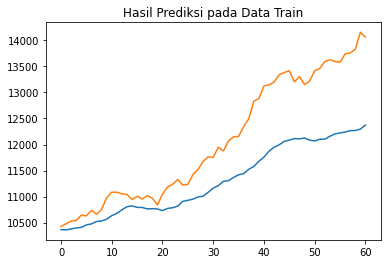

In [2098]:
plt.plot(resultRandomRNN_test)
plt.plot(random_model[look_back3+len(resultRandomRNN_train)::])
plt.title("Hasil Prediksi pada Data Train")

In [2099]:
RMSE_RANDOM_RNN_TEST = np.mean((resultRandomRNN_test - random_model[look_back3+len(resultRandomRNN_train)::])**2)
RMSE_RANDOM_RNN_TEST

847584.5417022199

LSTM (Long-Short Term Memory)

Model LSTM pada Data Gelombang

In [2100]:
#Model LSTM 1 hidden layer
def model_lstm1(look_back):
    model=tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(32, input_shape=(1, look_back), activation='relu')) # 1 hidden layer saja
    model.add(tf.keras.layers.Dense(1))
    model.compile(loss='mean_squared_error',  optimizer='adam',metrics = ['mse', 'mae'])
    return model


#Model LSTM 2 hidden layer
def model_lstm2(look_back):
    model=tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(32, input_shape=(1, look_back), activation='relu')) # hidden layer 1
    model.add(tf.keras.layers.Dense(8, activation='sigmoid')) # hidden layer 2
    model.add(tf.keras.layers.Dense(1))
    model.compile(loss='mean_squared_error',  optimizer='adam',metrics = ['mse', 'mae'])
    return model

In [2101]:
from sklearn.preprocessing import MinMaxScaler
#create numpy.ndarray

Xwave = np.reshape(sin_wave, (-1, 1)) #LTSM requires more input features compared to RNN or DNN
scaler = MinMaxScaler(feature_range=(0, 1))#LTSM is senstive to the scale of features
Xwave = scaler.fit_transform(Xwave)

In [2102]:
look_back = 5
trainXwave, trainYwave = convert2matrix(Xwave, look_back)
# reshape input to be [samples, time steps, features]
trainXwave = np.reshape(trainXwave, (trainXwave.shape[0], 1, trainXwave.shape[1]))

In [2103]:
from sklearn.model_selection import train_test_split
trainXwave_train, trainXwave_test, trainYwave_train, trainYwave_test = train_test_split(trainXwave, trainYwave, test_size=0.2, shuffle=False)

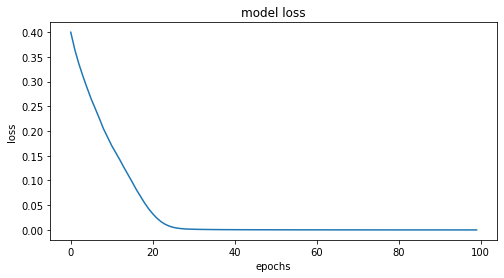

In [2104]:
#Model LSTM 1 Hidden Layer
tf.random.set_seed(4013)
modelWaveLSTM1 = model_lstm1(look_back)
history = modelWaveLSTM1.fit(trainXwave_train, trainYwave_train, epochs=100, verbose=0)
model_loss(history)

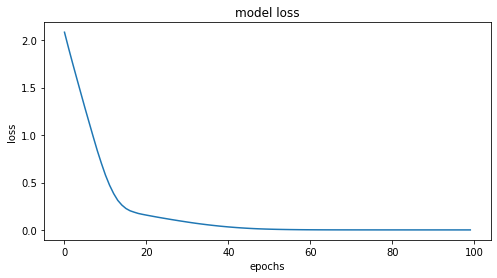

In [2105]:
#Model LSTM 2 Hidden Layer
tf.random.set_seed(4013)
modelWaveLSTM2 = model_lstm2(look_back)
history = modelWaveLSTM2.fit(trainXwave_train, trainYwave_train, epochs=100, verbose=0)
model_loss(history)

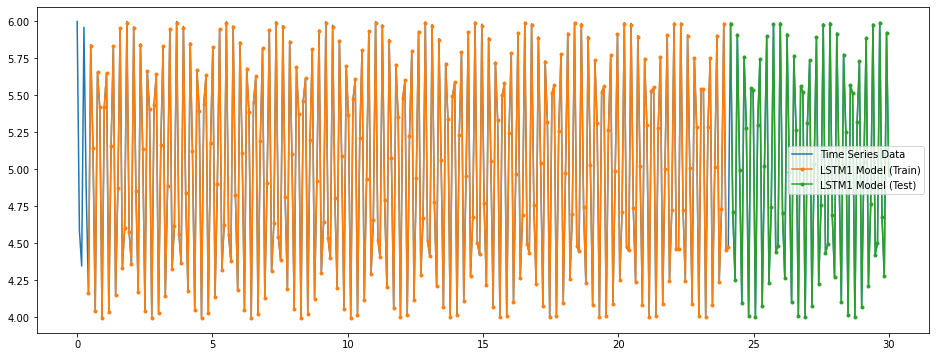

In [2106]:
#Model LSTM 1 hidden layer
plt.figure(figsize=(16,6))
YmodelWaveLSTM1_train = modelWaveLSTM1.predict(trainXwave_train)
YmodelWaveLSTM1_test = modelWaveLSTM1.predict(trainXwave_test)
#kembalikan skala
resultWaveLSTM1_train = scaler.inverse_transform(YmodelWaveLSTM1_train)
resultWaveLSTM1_test = scaler.inverse_transform(YmodelWaveLSTM1_test)
plt.plot(x_wave, sin_wave, label = 'Time Series Data')
plt.plot(x_wave[look_back:look_back+len(resultWaveLSTM1_train)], resultWaveLSTM1_train, '.-', label='LSTM1 Model (Train)')
plt.plot(x_wave[look_back+len(resultWaveLSTM1_train)::], resultWaveLSTM1_test, '.-', label='LSTM1 Model (Test)')
plt.legend()

(24.15041782729805, 30.0, 3.9, 6.1)

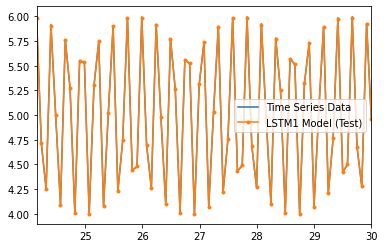

In [2107]:
#test data
plt.plot(x_wave, sin_wave, label = 'Time Series Data')
plt.plot(x_wave[look_back+len(resultWaveLSTM1_train)::], resultWaveLSTM1_test, '.-', label='LSTM1 Model (Test)')
plt.legend()
plt.axis([x_wave[look_back+len(resultWaveLSTM1_train)],x_wave[-1], 3.9, 6.1])

In [2108]:
RMSE_WAVE_LSTM1_TRAIN = np.mean((resultWaveLSTM1_train - sin_wave[look_back:look_back+len(resultWaveLSTM1_train)])**2)
RMSE_WAVE_LSTM1_TRAIN

3.183726187515614e-05

In [2109]:
RMSE_WAVE_LSTM1_TEST = np.mean((resultWaveLSTM1_test - sin_wave[look_back+len(resultWaveLSTM1_train)::])**2)
RMSE_WAVE_LSTM1_TEST

3.2646119692236454e-05

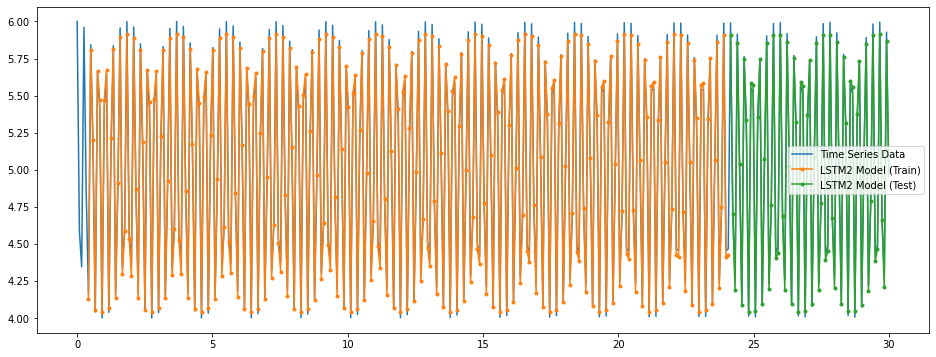

In [2110]:
#Model LSTM 2 hidden layer
plt.figure(figsize=(16,6))
YmodelWaveLSTM2_train = modelWaveLSTM2.predict(trainXwave_train)
YmodelWaveLSTM2_test = modelWaveLSTM2.predict(trainXwave_test)
#kembalikan skala
resultWaveLSTM2_train = scaler.inverse_transform(YmodelWaveLSTM2_train)
resultWaveLSTM2_test = scaler.inverse_transform(YmodelWaveLSTM2_test)
plt.plot(x_wave, sin_wave, label = 'Time Series Data')
plt.plot(x_wave[look_back:look_back+len(resultWaveLSTM2_train)], resultWaveLSTM2_train, '.-', label='LSTM2 Model (Train)')
plt.plot(x_wave[look_back+len(resultWaveLSTM2_train)::], resultWaveLSTM2_test, '.-', label='LSTM2 Model (Test)')
plt.legend()

(24.15041782729805, 30.0, 3.9, 6.1)

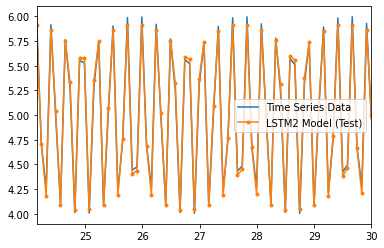

In [2111]:
#test data
plt.plot(x_wave, sin_wave, label = 'Time Series Data')
plt.plot(x_wave[look_back+len(resultWaveLSTM2_train)::], resultWaveLSTM2_test, '.-', label='LSTM2 Model (Test)')
plt.legend()
plt.axis([x_wave[look_back+len(resultWaveLSTM2_train)],x_wave[-1], 3.9, 6.1])

In [2112]:
RMSE_WAVE_LSTM2_TRAIN = np.mean((resultWaveLSTM2_train - sin_wave[look_back:look_back+len(resultWaveLSTM2_train)])**2)
RMSE_WAVE_LSTM2_TRAIN

0.002109335656093413

In [2113]:
RMSE_WAVE_LSTM2_TEST = np.mean((resultWaveLSTM2_test - sin_wave[look_back+len(resultWaveLSTM2_train)::])**2)
RMSE_WAVE_LSTM2_TEST

0.0022205494643418953

Model LSTM pada Data Acak

In [2114]:
from sklearn.preprocessing import MinMaxScaler
#pengaturan dimensi dengan reshape
random_model = np.reshape(random_model, (-1, 1)) 
#lakukan penskalaan data
scaler3 = MinMaxScaler(feature_range=(0, 1))
randomScaled = scaler3.fit_transform(random_model)

#buat dataset baru berukuran (n-look_back) x look_back
look_back3 = 4
XrandomScaled, YrandomScaled = convert2matrix(randomScaled, look_back3)
XrandomScaled = np.reshape(XrandomScaled, (XrandomScaled.shape[0], 1, XrandomScaled.shape[1]))

In [2115]:
from sklearn.model_selection import train_test_split
XrandomScaled_train, XrandomScaled_test, YrandomScaled_train, YrandomScaled_test = train_test_split(XrandomScaled, YrandomScaled, test_size=0.2, shuffle=False)

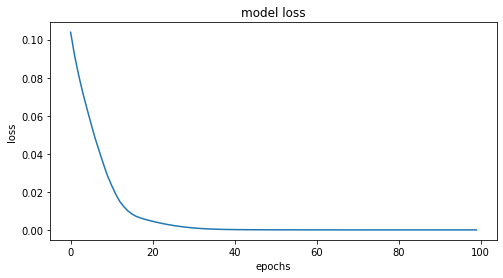

In [2116]:
tf.random.set_seed(4013)
modelRandomLSTM1 = model_lstm1(look_back3)
historyRandomLSTM1 = modelRandomLSTM1.fit(XrandomScaled_train, YrandomScaled_train, epochs=100, verbose=0)

model_loss(historyRandomLSTM1)

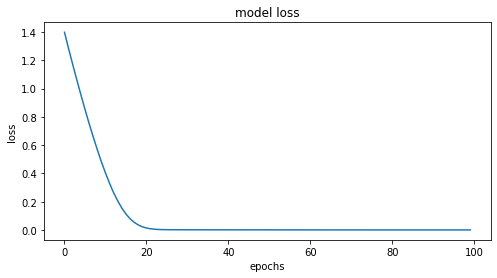

In [2117]:
tf.random.set_seed(4013)
modelRandomLSTM2 = model_lstm2(look_back3)
historyRandomLSTM2 = modelRandomLSTM2.fit(XrandomScaled_train, YrandomScaled_train, epochs=100, verbose=0)

model_loss(historyRandomLSTM2)

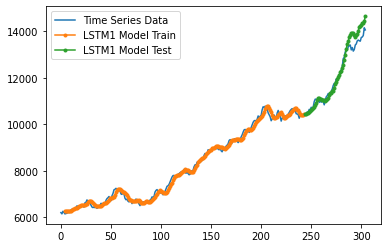

In [2118]:
YmodelRandomLSTM1_train = modelRandomLSTM1.predict(XrandomScaled_train)
YmodelRandomLSTM1_test = modelRandomLSTM1.predict(XrandomScaled_test)
#kembalikan skala
resultRandomLSTM1_train = scaler3.inverse_transform(YmodelRandomLSTM1_train)
resultRandomLSTM1_test = scaler3.inverse_transform(YmodelRandomLSTM1_test)
plt.plot(np.arange(len(random_model)), random_model, label = 'Time Series Data')
plt.plot(np.arange(look_back3,look_back3+len(resultRandomLSTM1_train)), resultRandomLSTM1_train, '.-', label='LSTM1 Model Train')
plt.plot(np.arange(look_back3+len(resultRandomLSTM1_train), len(random_model)), resultRandomLSTM1_test, '.-', label='LSTM1 Model Test')
plt.legend()

In [2119]:
RMSE_RANDOM_LSTM1_TRAIN = np.mean((resultRandomLSTM1_train - random_model[look_back3:look_back3+len(resultRandomLSTM1_train)])**2)
RMSE_RANDOM_LSTM1_TRAIN

15496.636511639075

Text(0.5, 1.0, 'Hasil Prediksi pada Data Train')

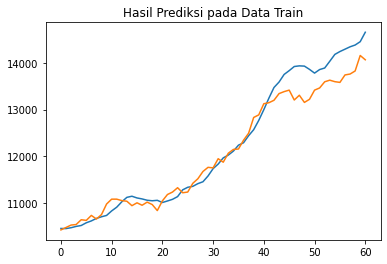

In [2120]:
plt.plot(resultRandomLSTM1_test)
plt.plot(random_model[look_back3+len(resultRandomLSTM1_train)::])
plt.title("Hasil Prediksi pada Data Train")

In [2121]:
RMSE_RANDOM_LSTM1_TEST = np.mean((resultRandomLSTM1_test - random_model[look_back3+len(resultRandomLSTM1_train)::])**2)
RMSE_RANDOM_LSTM1_TEST

93936.41216855863

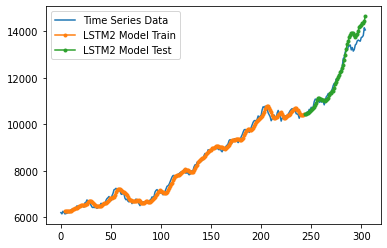

In [2122]:
YmodelRandomLSTM2_train = modelRandomLSTM1.predict(XrandomScaled_train)
YmodelRandomLSTM2_test = modelRandomLSTM1.predict(XrandomScaled_test)
#kembalikan skala
resultRandomLSTM2_train = scaler3.inverse_transform(YmodelRandomLSTM2_train)
resultRandomLSTM2_test = scaler3.inverse_transform(YmodelRandomLSTM2_test)
plt.plot(np.arange(len(random_model)), random_model, label = 'Time Series Data')
plt.plot(np.arange(look_back3,look_back3+len(resultRandomLSTM2_train)), resultRandomLSTM2_train, '.-', label='LSTM2 Model Train')
plt.plot(np.arange(look_back3+len(resultRandomLSTM2_train), len(random_model)), resultRandomLSTM2_test, '.-', label='LSTM2 Model Test')
plt.legend()

In [2123]:
RMSE_RANDOM_LSTM2_TRAIN = np.mean((resultRandomLSTM2_train - random_model[look_back3:look_back3+len(resultRandomLSTM2_train)])**2)
RMSE_RANDOM_LSTM2_TRAIN

15496.636511639075

Text(0.5, 1.0, 'Hasil Prediksi pada Data Train')

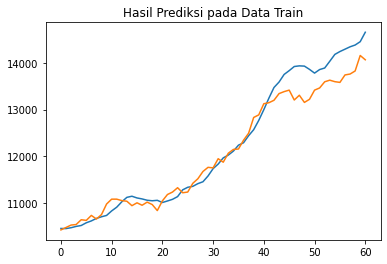

In [2124]:
plt.plot(resultRandomLSTM2_test)
plt.plot(random_model[look_back3+len(resultRandomLSTM2_train)::])
plt.title("Hasil Prediksi pada Data Train")

In [2125]:
RMSE_RANDOM_LSTM2_TEST = np.mean((resultRandomLSTM2_test - random_model[look_back3+len(resultRandomLSTM2_train)::])**2)
RMSE_RANDOM_LSTM2_TEST

93936.41216855863

In [2126]:
errors = [RMSE_WAVE_DNN_TRAIN, RMSE_WAVE_DNN_TEST, RMSE_WAVE_RNN_TRAIN, RMSE_WAVE_RNN_TEST, RMSE_WAVE_LSTM1_TRAIN, RMSE_WAVE_LSTM1_TEST, 
          RMSE_WAVE_LSTM2_TRAIN, RMSE_WAVE_LSTM2_TEST]
d = {'Model Data Periodik (Gelombang)': ['Deep Neural Network Train', 'Deep Neural Network Test','Recurrent Neural Network Train', 'Recurrent Neural Network Test',
               'LSTM 1 Hidden Layer Train','LSTM 1 Hidden Layer Test', 'LSTM 2 Hidden Layer Train', 'LSTM 2 Hidden Layer Test'], 'RMSE' : errors}
compareWave = pd.DataFrame(d)
compareWave

,Model Data Periodik (Gelombang),RMSE
0,Deep Neural Network Train,0.995636
1,Deep Neural Network Test,0.779055
2,Recurrent Neural Network Train,0.002751
3,Recurrent Neural Network Test,0.002842
4,LSTM 1 Hidden Layer Train,0.000032
5,LSTM 1 Hidden Layer Test,0.000033
6,LSTM 2 Hidden Layer Train,0.002109
7,LSTM 2 Hidden Layer Test,0.002221


In [2127]:
errors = [RMSE_RANDOM_DNN_TRAIN, RMSE_RANDOM_DNN_TEST, RMSE_RANDOM_RNN_TRAIN, RMSE_RANDOM_RNN_TEST, RMSE_RANDOM_LSTM1_TRAIN, RMSE_RANDOM_LSTM1_TEST, 
          RMSE_RANDOM_LSTM2_TRAIN, RMSE_RANDOM_LSTM2_TEST]
d = {'Model Data Acak (Brownian Motion)': ['Deep Neural Network Train', 'Deep Neural Network Test','Recurrent Neural Network Train', 'Recurrent Neural Network Test',
               'LSTM 1 Hidden Layer Train','LSTM 1 Hidden Layer Test', 'LSTM 2 Hidden Layer Train', 'LSTM 2 Hidden Layer Test'], 'RMSE' : errors}
compareRandom = pd.DataFrame(d)
compareRandom

,Model Data Acak (Brownian Motion),RMSE
0,Deep Neural Network Train,6.977046e+07
1,Deep Neural Network Test,1.345665e+08
2,Recurrent Neural Network Train,2.005638e+04
3,Recurrent Neural Network Test,8.475845e+05
4,LSTM 1 Hidden Layer Train,1.549664e+04
5,LSTM 1 Hidden Layer Test,9.393641e+04
6,LSTM 2 Hidden Layer Train,1.549664e+04
7,LSTM 2 Hidden Layer Test,9.393641e+04
